<a href="https://colab.research.google.com/github/HyejuSeon/deep_learning_study/blob/main/advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

# 전문가를 위한 TensorFlow 2 빠른 시작

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.12.0


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드


In [2]:
mnist = tf.keras.datasets.mnist

## Train/Test split

### 딥러닝 사이클

- 가설 수립 -> 모델 정의 및 학습 -> 평가 -> 가설 수립(피드백) -> 모델 정의 및 학습 -> ...

### split 비율

- 7:3 or 8:2

- BUT 빅데이터는 99:1
  
  -> 100만개의 1%는 1만개


<br><br>

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.11667343, 0.1944725 , 0.0351754 , 0.04574939, 0.17889906,
        0.03797491, 0.09490842, 0.04198777, 0.12715615, 0.12700297]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.10152161, 0.10973526, 0.09357597, 0.09457069, 0.10803954,
        0.0938383 , 0.09933586, 0.09421561, 0.10259143, 0.10257571]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.3661823

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 3ms/step - loss: 0.2970 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1403 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0753 - accuracy: 0.9758


In [12]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0491 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9859
313/313 - 1s - loss: 0.0760 - accuracy: 0.9784 - 696ms/epoch - 2ms/step


[0.07602833956480026, 0.9783999919891357]

In [13]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [14]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533676, 0.08533676, 0.08533676, 0.08533678, 0.08533676,
        0.08533676, 0.08533676, 0.23196898, 0.08533676, 0.08533686],
       [0.08533675, 0.08533682, 0.23196913, 0.08533676, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.08535047, 0.231752  , 0.08535245, 0.08535057, 0.08535928,
        0.08535048, 0.08535069, 0.08540852, 0.08537506, 0.08535048],
       [0.23196813, 0.08533682, 0.08533707, 0.08533682, 0.08533682,
        0.08533682, 0.08533683, 0.08533709, 0.08533682, 0.08533682],
       [0.08542358, 0.08542358, 0.08542366, 0.08542358, 0.23058894,
        0.08542358, 0.08542358, 0.08542376, 0.08542358, 0.08602216]],
      dtype=float32)>

tf.data를 사용하여 데이터셋을 섞고 배치 생성

In [ ]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

## Hyperparameters

### Activation Function



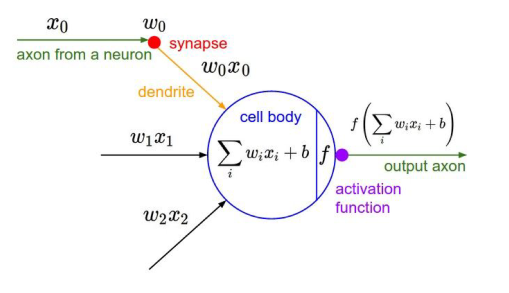

입력값에 씌워 출력값으로 변환하는 함수

> 입력 : input 또는 이전 레이어 결과 값(x)과 weight(w)의 내적값



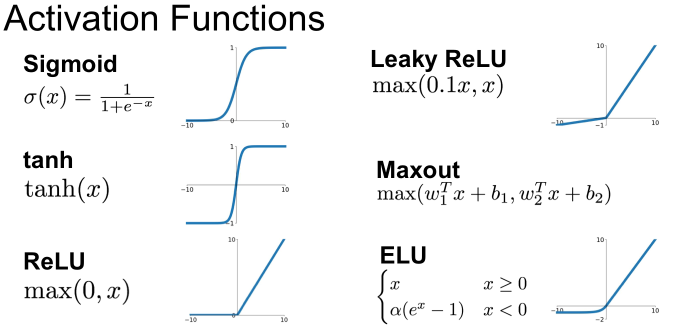

#### sigmoid
- binary classification에서 사용
- 0~1 사이의 값

#### ReLU
- 가장 많이 사용

### Loss Function

- 정답값과 모델의 예측값을 통해 loss를 계산하는 함수

- 모델은 loss를 최소화하는 weight을 찾는 방향으로 학습 수행

#### binary_crossentropy
- binary classification에서 사용

<br>

#### categorical_crossentropy
- multi classification에서 사용
- label이 one-hot encoding 형태일 때 사용

> label 예시 -one-hot encoding<br> <p> label에 사람, 강아지, 고양이가 있다면 <br> 사람 -> (1, 0, 0) <br> 강아지 -> (0, 1, 0) <br> 고양이 -> (0, 0, 1)

<br>

#### sparse_categorical_crossentropy
- 위와 동일하게 multi classification에서 사용
- label 정수 형태에서 사용
> label 예시 - 정수 <br> 사람 -> 0, 강아지 -> 1, 고양이 -> 2

<br>

#### mean_squared_error(MSE)
- 연속형 데이터에서 사용

케라스(Keras)의 [모델 서브클래싱(subclassing) API](https://www.tensorflow.org/guide/keras#model_subclassing)를 사용하여 `tf.keras` 모델을 만듭니다:

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

훈련에 필요한 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

모델의 손실과 성능을 측정할 지표를 선택합니다. 에포크가 진행되는 동안 수집된 측정 지표를 바탕으로 최종 결과를 출력합니다.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

`tf.GradientTape`를 사용하여 모델을 훈련합니다:

In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

이제 모델을 테스트합니다:

In [ ]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성합니다. 더 자세한 내용은 [TensorFlow 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.